This Jupyter notebook is designed to evaluate the consequences of not implementing any flood management interventions along the IJssel River. It systematically configures and runs a model using the EMA Workbench to simulate outcomes under this policy scenario, providing a critical baseline for assessing the effectiveness of more proactive measures. This includes  simulations, and result visualizations sections that discuss the potential risks and damages associated with the base case. 

## Step 0

Import all the necessary libraries. 

In [13]:
from ema_workbench.em_framework.evaluators import perform_experiments

from ema_workbench import (
    Model,
    Policy,
    MultiprocessingEvaluator,
    SequentialEvaluator,
    ScalarOutcome,
    IntegerParameter,
    optimize,
    Scenario,
)

from ema_workbench import save_results, load_results
from ema_workbench.em_framework.optimization import (EpsilonProgress,
                                                     ArchiveLogger)
from ema_workbench import Constraint
from ema_workbench.util import ema_logging
from ema_workbench.analysis import dimensional_stacking, parcoords
from ema_workbench import Scenario
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import prim

from problem_formulation import get_model_for_problem_formulation

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import os
import shutil

## Step 1

Call the Problem Formulation from problem_formulation.py

In [14]:
ema_logging.log_to_stderr(ema_logging.INFO)

# Select 'Urban Dikes' or 'All Dikes'. 
# the detailed of the problem formulation is in the `problem_formulation.py` file
dike_model, planning_steps = get_model_for_problem_formulation('All Dikes')

## Step 2 : Base Case

We evaluate the "base case" policy across 10,000 different scenarios using the MultiprocessingEvaluator from the EMA Workbench. This evaluator leverages parallel computing to efficiently conduct a total of 10,000 experiments, simulating the outcomes of the policy across varied conditions.

In [15]:
# create function to get no policy scenarios in EMA Workbench
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

BaseCase = Policy("Base Case", **get_do_nothing_dict())

In [16]:
# Pass the policies list and run the experiments
n_scenarios = 10000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, BaseCase)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 10000 scenarios * 1 policies * 1 model(s) = 10000 experiments
100%|████████████████████████████████████| 10000/10000 [09:23<00:00, 17.74it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [17]:
# save the results
experiments, outcomes = results

In [18]:
# export results to have a reproducible results
save_results((experiments, outcomes), './output/results_base_case.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Hidayahtullah Abdi R\Documents\EPA 2023 -2024\Q4\Model-Based Decision Making\epa141A_open-master\final_assignment_fix\Clean_Version\output\results_base_case.tar.gz


In [19]:
# load results from the previous experiments
experiments, outcomes = load_results('./output/results_base_case.tar.gz')
experiments

[MainProcess/INFO] results loaded successfully from C:\Users\Hidayahtullah Abdi R\Documents\EPA 2023 -2024\Q4\Model-Based Decision Making\epa141A_open-master\final_assignment_fix\Clean_Version\output\results_base_case.tar.gz


A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                         112  181.304298       1.0   0.374986   92.926556   
1                          54  223.735142       1.5   0.903398  260.648511   
2                         121  118.006375      10.0   0.061053  308.958489   
3                         131   72.888423       1.0   0.031919  255.951827   
4                         116  210.084743       1.5   0.559907  259.601363   
...                       ...         ...       ...        ...         ...   
9995                       56  319.686661       1.5   0.322696  169.402098   
9996                       53  166.823665       1.0   0.518044  316.087389   
9997                       20  295.433161      10.0   0.527536  299.928773   
9998                      132   89.790579       1.0   0.072704  287.273253   
9999                      108  111.414302       1.0   0.008504  127.958651   

     A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0          1.0   0.950543  196.670263      10.0   0.713441  ...   
1          1.0   0.408409  109.631510       1.0   0.255332  ...   
2          1.5   0.996664  254.740231      10.0   0.301356  ...   
3          1.5   0.760233  312.368318      10.0   0.791747  ...   
4          1.0   0.361623  288.116600      10.0   0.318629  ...   
...        ...        ...         ...       ...        ...  ...   
9995      10.0   0.945345  313.221362       1.0   0.884993  ...   
9996      10.0   0.352361   82.329659       1.0   0.568699  ...   
9997      10.0   0.728306  209.211425      10.0   0.639936  ...   
9998      10.0   0.094025  275.240491       1.0   0.213444  ...   
9999       1.5   0.452941   41.304198       1.0   0.065927  ...   

      A.3_DikeIncrease 2 A.4_DikeIncrease 0  A.4_DikeIncrease 1  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   
...                  ...                ...                 ...   
9995                   0                  0                   0   
9996                   0                  0                   0   
9997                   0                  0                   0   
9998                   0                  0                   0   
9999                   0                  0                   0   

      A.4_DikeIncrease 2 A.5_DikeIncrease 0  A.5_DikeIncrease 1  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   
...                  ...                ...                 ...   
9995                   0                  0                   0   
9996                   0                  0                   0   
9997                   0                  0                   0   
9998                   0                  0                   0   
9999                   0                  0                   0   

     A.5_DikeIncrease 2 scenario     policy     model  
0                     0    10000  Base Case  dikesnet  
1                     0    10001  Base Case  dikesnet  
2                     0    10002  Base Case  dikesnet  
3                     0    10003  Base Case  dikesnet  
4                     0    10004  Base Case  dikesnet  
...                 ...      ...        ...       ...  
9995                  0    19995  Base Case  dikesnet  
9996                  0    19996  Base Case  dikesnet  
9997                  0    19997  Base Case  dikesnet  
9998                  0    19998  Base Case  dikesnet  
9999                  0    19999  Base

In [20]:
# transform the outcomes array to panda dataframe
outcomes = pd.DataFrame(outcomes)

We want to check the result of the EMA_Workbench to make sure it fits our purpose.

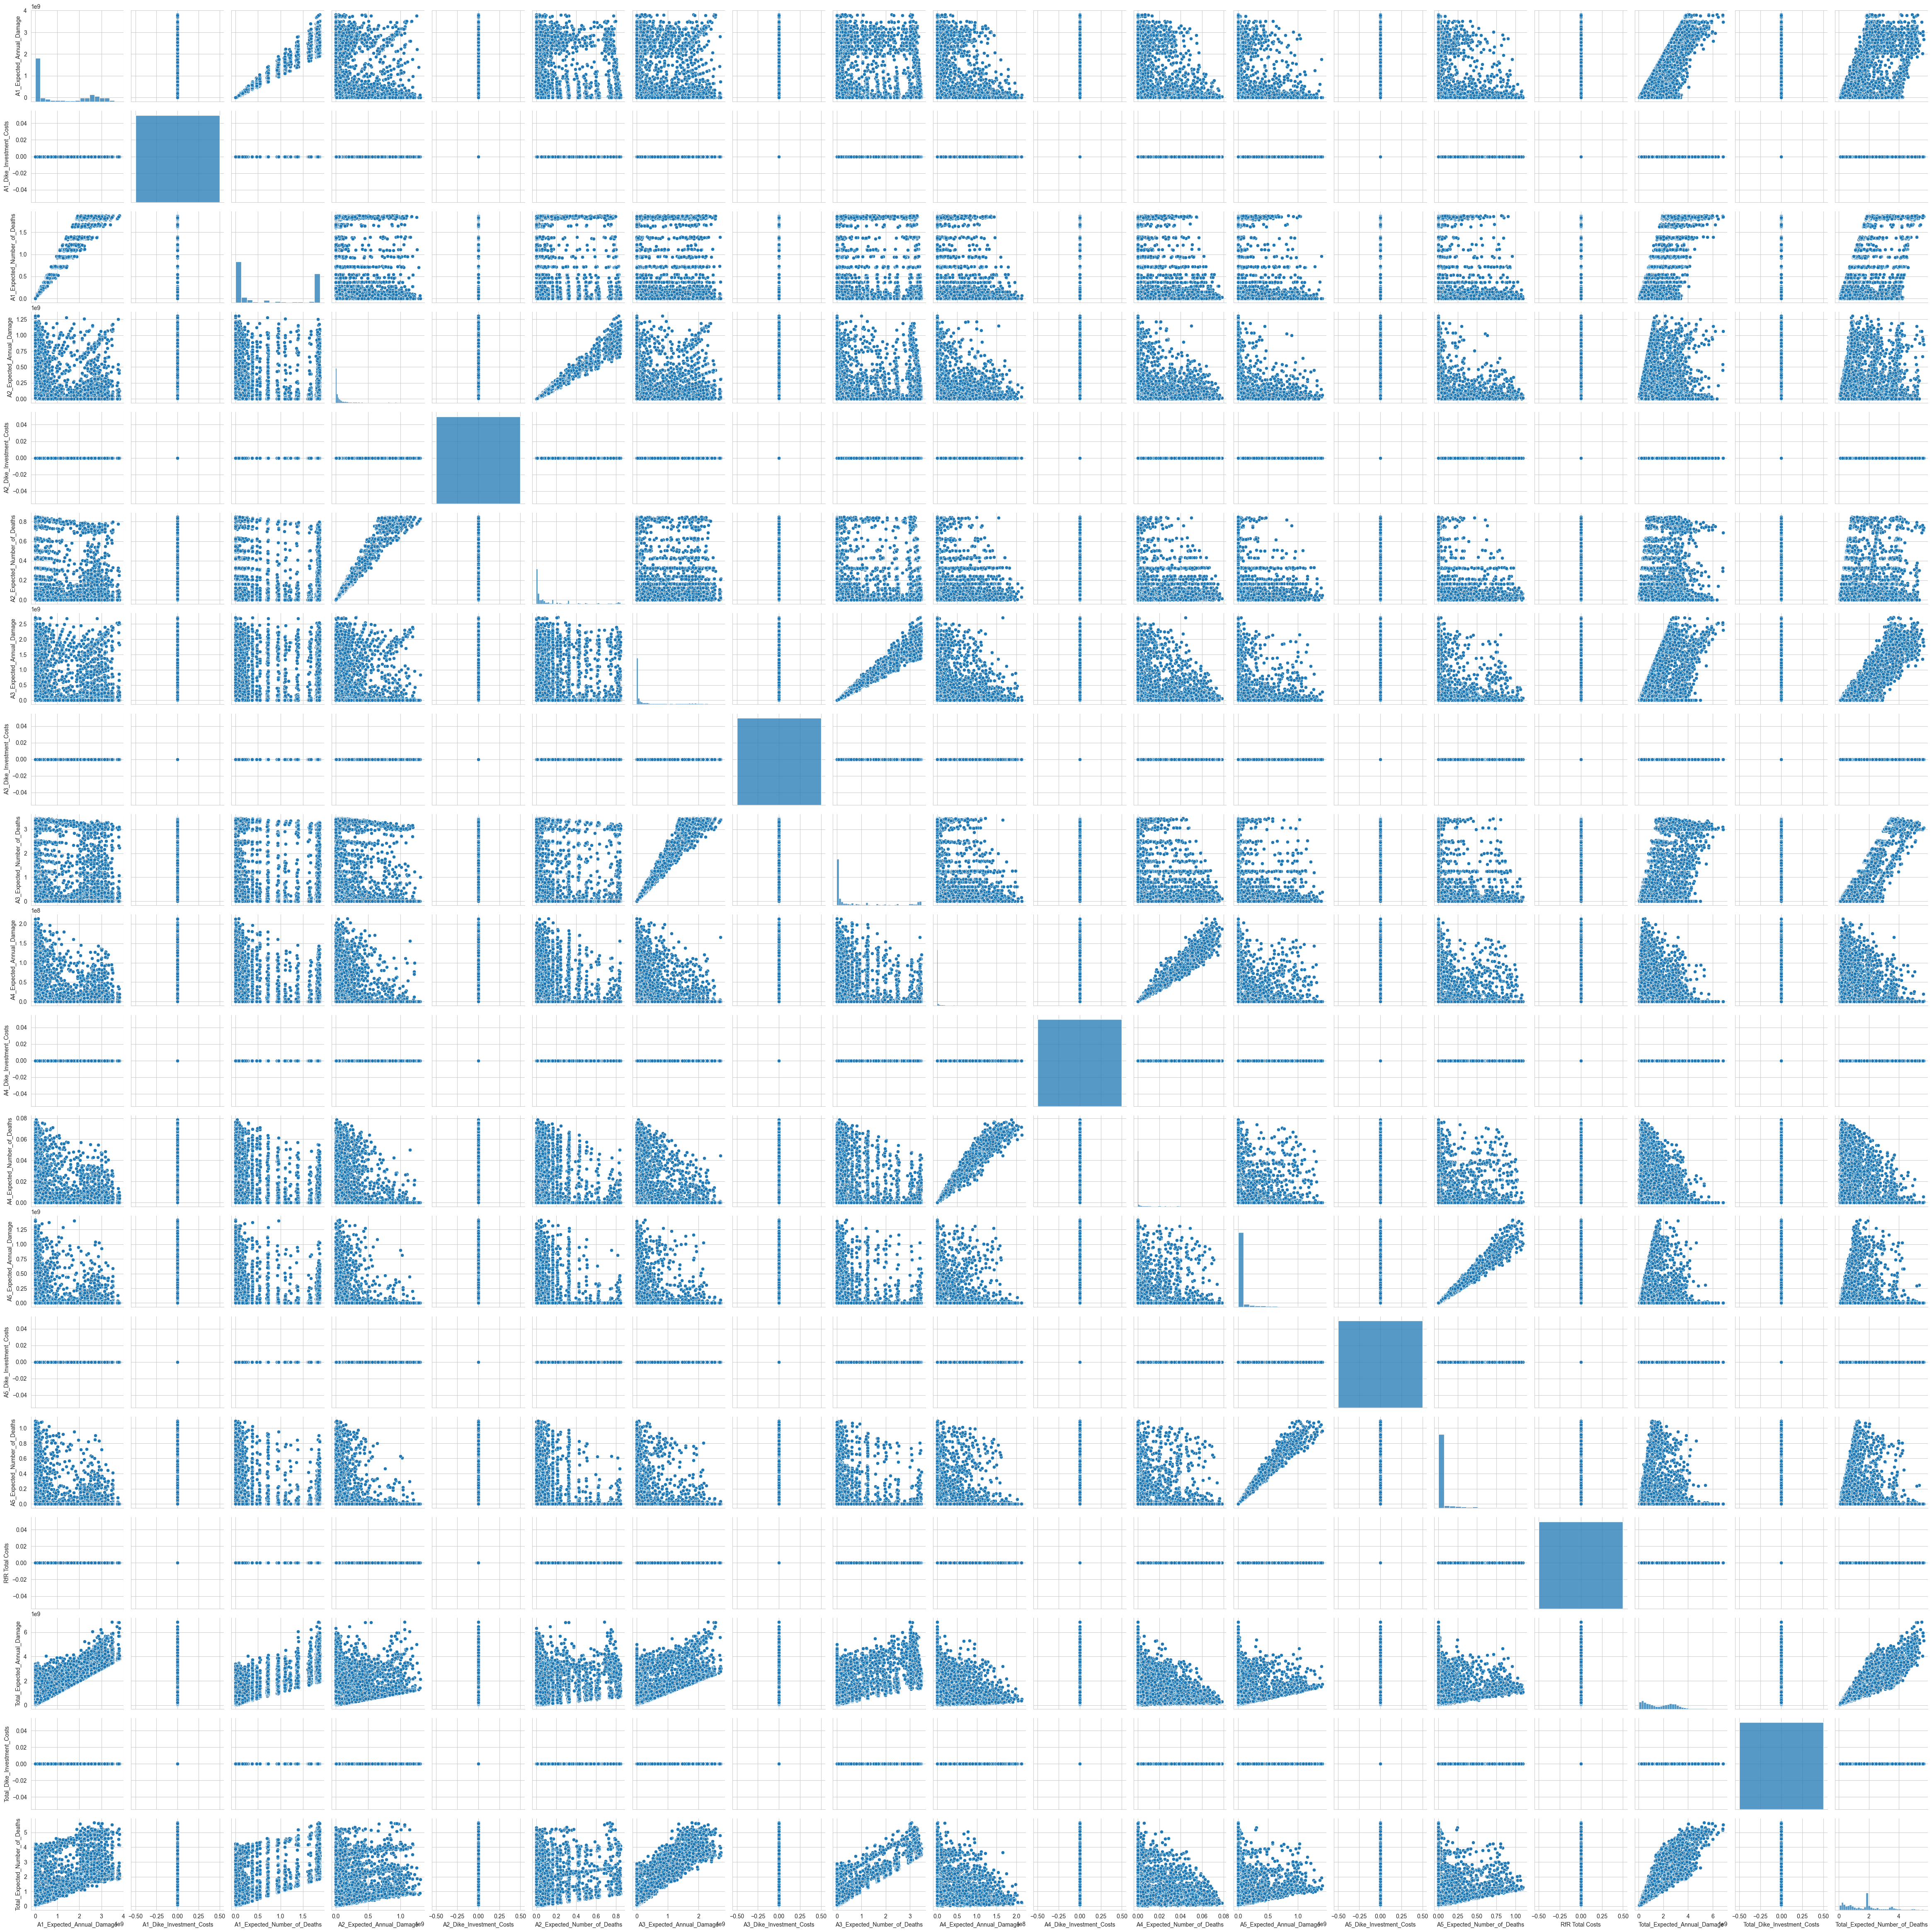

In [21]:
# pairplot to see the relationship between the outcomes
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

In [22]:
# drop the levers and unnecessary columns to analyse the coverage
# drop the levers
cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)
# drop the unnecessary attribute
cleaned_experiments.drop(columns= ['scenario', 'policy', 'model'], inplace= True)
# show the dataframe
cleaned_experiments

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                         112  181.304298       1.0   0.374986   92.926556   
1                          54  223.735142       1.5   0.903398  260.648511   
2                         121  118.006375      10.0   0.061053  308.958489   
3                         131   72.888423       1.0   0.031919  255.951827   
4                         116  210.084743       1.5   0.559907  259.601363   
...                       ...         ...       ...        ...         ...   
9995                       56  319.686661       1.5   0.322696  169.402098   
9996                       53  166.823665       1.0   0.518044  316.087389   
9997                       20  295.433161      10.0   0.527536  299.928773   
9998                      132   89.790579       1.0   0.072704  287.273253   
9999                      108  111.414302       1.0   0.008504  127.958651   

     A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail    A.4_Bmax  \
0          1.0   0.950543  196.670263      10.0   0.713441   62.636015   
1          1.0   0.408409  109.631510       1.0   0.255332  347.151616   
2          1.5   0.996664  254.740231      10.0   0.301356  201.373264   
3          1.5   0.760233  312.368318      10.0   0.791747  313.181721   
4          1.0   0.361623  288.116600      10.0   0.318629   89.419835   
...        ...        ...         ...       ...        ...         ...   
9995      10.0   0.945345  313.221362       1.0   0.884993   81.341828   
9996      10.0   0.352361   82.329659       1.0   0.568699  312.640376   
9997      10.0   0.728306  209.211425      10.0   0.639936   64.493885   
9998      10.0   0.094025  275.240491       1.0   0.213444  184.459540   
9999       1.5   0.452941   41.304198       1.0   0.065927  260.156421   

     A.4_Brate  A.4_pfail    A.5_Bmax A.5_Brate  A.5_pfail discount rate 0  \
0          1.0   0.027531  178.665569       1.5   0.918364             4.5   
1          1.0   0.993949   34.723261       1.0   0.462900             3.5   
2          1.5   0.425002  110.645892       1.5   0.238361             4.5   
3          1.5   0.673687  254.509612       1.5   0.147328             1.5   
4          1.0   0.202547   62.458508      10.0   0.607019             1.5   
...        ...        ...         ...       ...        ...             ...   
9995       1.5   0.152317  146.384629      10.0   0.420251             1.5   
9996       1.5   0.582728  187.486206      10.0   0.777875             1.5   
9997       1.0   0.986311  347.516840      10.0   0.959072             4.5   
9998      10.0   0.498608  137.086353      10.0   0.317406             4.5   
9999       1.0   0.163516  162.032062      10.0   0.839780             2.5   

     discount rate 1 discount rate 2  
0                3.5             2.5  
1                2.5             1.5  
2                2.5             2.5  
3                4.5             4.5  
4                3.5             3.5  
...              ...             ...  
9995             4.5             2.5  
9996             1.5             4.5  
9997             1.5             4.5  
9998             3.5             3.5  
9999             4.5             4.5  

[10000 rows x 19 columns]

In [23]:
# Display the first few rows of the outcomes DataFrame
outcomes.head()

A1_Expected_Annual_Damage  A1_Dike_Investment_Costs  \
0               1.411386e+09                         0   
1               0.000000e+00                         0   
2               2.580873e+09                         0   
3               2.550088e+09                         0   
4               9.166469e+07                         0   

   A1_Expected_Number_of_Deaths  A2_Expected_Annual_Damage  \
0                      1.121934               0.000000e+00   
1                      0.000000               9.516098e+07   
2                      1.858474               0.000000e+00   
3                      1.874800               1.424391e+06   
4                      0.065477               1.289985e+08   

   A2_Dike_Investment_Costs  A2_Expected_Number_of_Deaths  \
0                         0                      0.000000   
1                         0                      0.083886   
2                         0                      0.000000   
3                         0                      0.001524   
4                         0                      0.119691   

   A3_Expected_Annual_Damage  A3_Dike_Investment_Costs  \
0               0.000000e+00                         0   
1               1.028937e+09                         0   
2               1.493587e+08                         0   
3               9.771379e+06                         0   
4               7.094908e+08                         0   

   A3_Expected_Number_of_Deaths  A4_Expected_Annual_Damage  \
0                      0.000000               1.241279e+08   
1                      1.664094               0.000000e+00   
2                      0.284171               0.000000e+00   
3                      0.019833               1.966746e+06   
4                      1.237789               5.975341e+07   

   A4_Dike_Investment_Costs  A4_Expected_Number_of_Deaths  \
0                         0                      0.057434   
1                         0                      0.000000   
2                         0                      0.000000   
3                         0                      0.001151   
4                         0                      0.026527   

   A5_Expected_Annual_Damage  A5_Dike_Investment_Costs  \
0               0.000000e+00                         0   
1               0.000000e+00                         0   
2               0.000000e+00                         0   
3               2.380777e+08                         0   
4               0.000000e+00                         0   

   A5_Expected_Number_of_Deaths  RfR Total Costs  \
0                      0.000000              0.0   
1                      0.000000              0.0   
2                      0.000000              0.0   
3                      0.236155              0.0   
4                      0.000000              0.0   

   Total_Expected_Annual_Damage  Total_Dike_Investment_Costs  \
0                  1.535514e+09                            0   
1                  1.124098e+09                            0   
2                  2.730232e+09                            0   
3                  2.801329e+09                            0   
4                  9.899074e+08                            0   

   Total_Expected_Number_of_Deaths  
0                         1.179367  
1                         1.747980  
2                         2.142646  
3                         2.133463  
4                         1.449483